In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

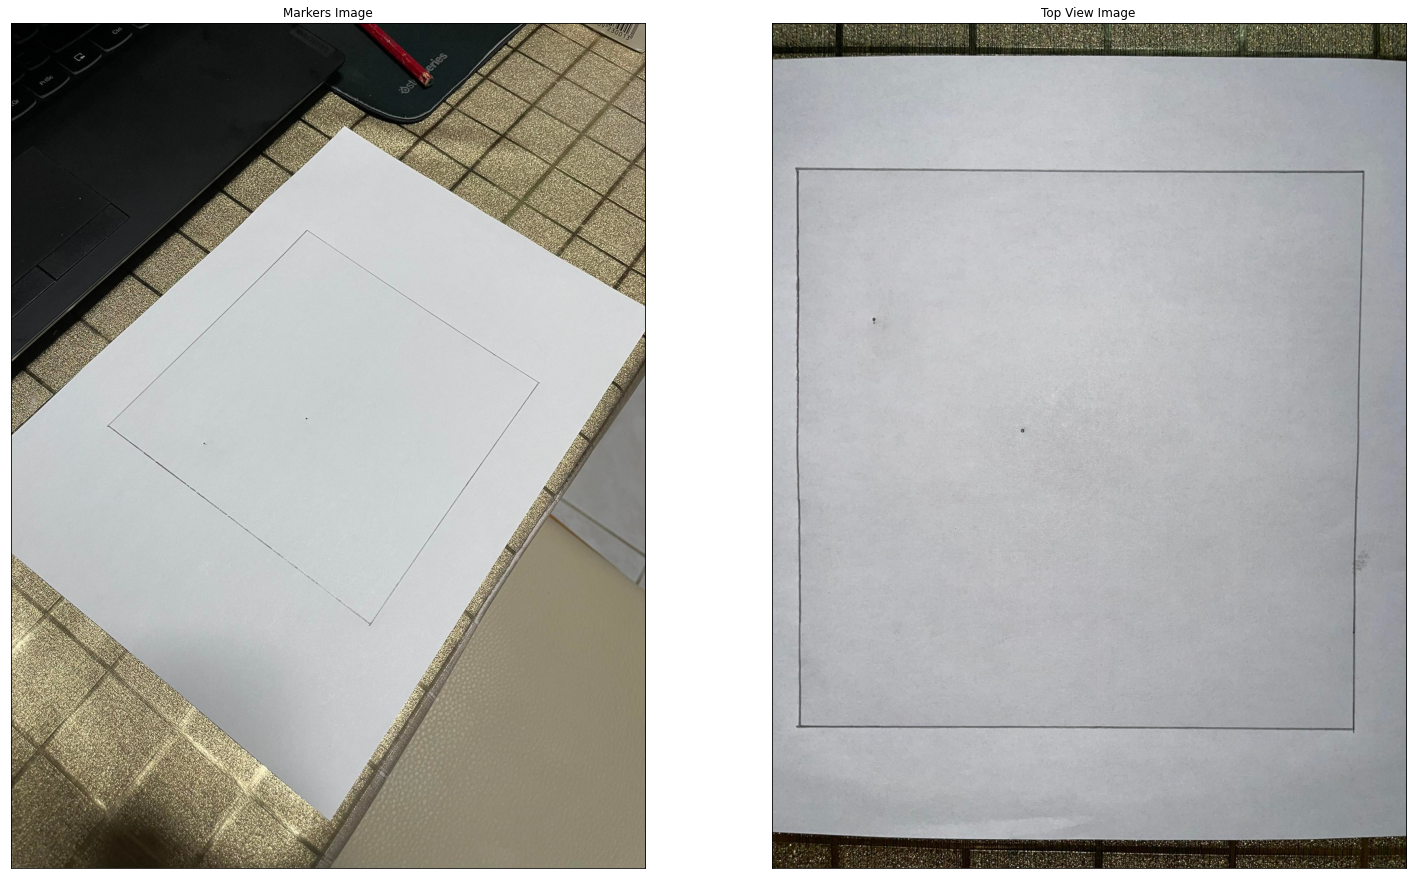

In [15]:
pers_image = cv.imread('ex2-images/view1.jpg')
pers_image = cv.cvtColor(pers_image, cv.COLOR_BGR2RGB)  # convert from BGR to RGB

top_image = cv.imread('ex2-images/top_view.jpg')
top_image = cv.cvtColor(top_image, cv.COLOR_BGR2RGB)  # convert from BGR to RGB


plt.figure(figsize=(25,25))
plt.subplot(121),plt.imshow(pers_image)
plt.title('Markers Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(top_image)
plt.title('Top View Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
pers_points = []
top_points = []

In [17]:
def mouse_click(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        # Add the selected point to the list
        pers_points.append((x, y))
        # Draw a small circle at the selected point
        cv.circle(pers_image, (x, y), 3, (0, 0, 255), -1)

def mouse_click2(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        # Add the selected point to the list
        top_points.append((x, y))
        # Draw a small circle at the selected point
        cv.circle(top_image, (x, y), 3, (0, 0, 255), -1)

In [19]:
# Create a window to display the image and set the mouse callback function
cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.resizeWindow('Image', 1920, 1080)

cv.setMouseCallback('Image', mouse_click)

# Display the image until the user presses a key
while True:
    cv.imshow('Image', pers_image)
    key = cv.waitKey(1) & 0xFF
    if key == ord('q'):
        cv.destroyAllWindows()
        break

In [20]:
# Create a window to display the image and set the mouse callback function
cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.resizeWindow('Image', 1920, 1080)

cv.setMouseCallback('Image', mouse_click2)

# Display the image until the user presses a key
while True:
    cv.imshow('Image', top_image)
    key = cv.waitKey(1) & 0xFF
    if key == ord('q'):
        cv.destroyAllWindows()
        break

Homography Matrix:
 [[ 1.44104930e+00 -1.85156944e+00  1.55091935e+03]
 [ 1.79195165e+00  1.96898808e+00 -1.85554936e+03]
 [-5.74694139e-05  3.82515403e-04  1.00000000e+00]]


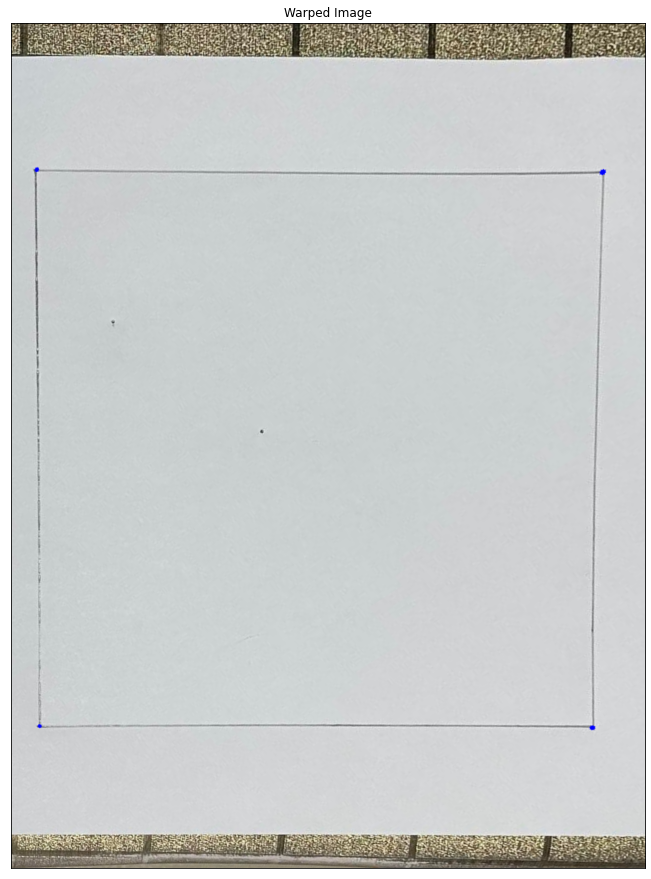

In [81]:
# Compute the homography matrix
H, _ = cv.findHomography(np.array(pers_points), np.array(top_points))

# Print the resulting homography matrix
print("Homography Matrix:\n", H)

# Warp the image
warped = cv.warpPerspective(pers_image, H, (top_image.shape[1], top_image.shape[0]))

# Display the result
plt.figure(figsize=(25,25))
plt.subplot(121),plt.imshow(warped)
plt.title('Warped Image'), plt.xticks([]), plt.yticks([])
plt.show()



In [77]:
points = []

In [79]:
width_mm = 150
height_mm = 150

def mouse_distance_callback(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
       # Get the coordinates of the point in the warped image
        pt = np.array([[x, y]], dtype=np.float32)

        points.append((x, y))

        # Compute the coordinates of the point in the original image using the inverse homography
        inv_H = np.linalg.inv(H)
        orig_pt = cv.perspectiveTransform(pt[None, :], inv_H)[0, 0]
        # Convert pixel coordinates to millimeters
        x_mm = orig_pt[0] * (width_mm / warped.shape[1])
        y_mm = orig_pt[1] * (height_mm / warped.shape[0])

        # Display the coordinates of the point and its position in millimeters
        print(f"({orig_pt[0]:.2f}, {orig_pt[1]:.2f}) -> ({x_mm:.2f}, {y_mm:.2f} mm)")

        # Draw the point and its position on the image
        cv.circle(warped, (x, y), 3, (0, 0, 255), -1)
        cv.putText(warped, f"({x_mm:.2f}, {y_mm:.2f} mm)", (x + 10, y + 40), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
        # Calculate the distance between two points
        if len(points) == 2:
            x1_mm = points[0][0] * (width_mm / warped.shape[1])
            y1_mm = points[0][1] * (height_mm / warped.shape[0])
            x2_mm = x_mm
            y2_mm = y_mm
            distance_mm = np.sqrt((x2_mm - x1_mm)**2 + (y2_mm - y1_mm)**2)
            cv.line(warped, points[0], (x, y), (0, 255, 0), 2)
            cv.putText(warped, f"{distance_mm:.2f} mm", ((points[0][0] + x) // 2, (points[0][1] + y) // 2), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            points.clear()
            





In [ ]:
width_mm = 150
height_mm = 150

def mouse_distance_callback(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        # Define o ponto clicado
        pt = np.array([[x, y]], dtype=np.float32)

        # Transforma as coordenadas para a imagem original usando a matriz de homografia inversa
        inv_H = np.linalg.inv(H)
        orig_pt = cv.perspectiveTransform(pt[None, :], inv_H)[0, 0]

        cv.circle(warped, (x, y), 3, (0, 0, 255), -1)
        cv.putText(warped, f"({orig_pt[0]:.2f}, {orig_pt[1]:.2f})", (x + 10, y + 10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Imprime as coordenadas do ponto
        print("Warped Point: ({:.2f}, {:.2f}) - Original Point: ({:.2f}, {:.2f})".format(x, y, orig_pt[0], orig_pt[1]))

In [ ]:
width_mm = 150
height_mm = 150

def mouse_distance_callback(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        # Define o ponto clicado
        pt = np.array([[x, y]], dtype=np.float32)

        # Transforma as coordenadas para a imagem original usando a matriz de homografia inversa
        inv_H = np.linalg.inv(H)
        orig_pt = cv.perspectiveTransform(pt[None, :], inv_H)[0, 0]

        cv.circle(warped, (x, y), 3, (0, 0, 255), -1)
        cv.putText(warped, f"({orig_pt[0]:.2f}, {orig_pt[1]:.2f})", (x + 10, y + 10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Imprime as coordenadas do ponto
        print("Warped Point: ({:.2f}, {:.2f}) - Original Point: ({:.2f}, {:.2f})".format(x, y, orig_pt[0], orig_pt[1]))

In [30]:
# Define a callback function to handle mouse events
def mouse_distance_callback(event, x, y, flags, param):
    global points
    if event == cv.EVENT_LBUTTONDOWN:
        # Get the coordinates of the point in the warped image
        pt = (x, y)
        # Draw a circle at the selected point
        cv.circle(warped, pt, 3, (0, 0, 255), -1)
        # Compute the coordinates of the point in the original image using the inverse homography
        inv_H, _ = cv.invert(H)
        orig_pt = cv.perspectiveTransform(np.array([[[x, y]]], dtype=np.float32), inv_H)[0][0]
        # Display the coordinates of the point
        cv.putText(warped, f"({orig_pt[0]:.2f}, {orig_pt[1]:.2f})", pt, cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        # Update the list of selected points
        points.append(pt)
        # If two points have been selected, compute the distance between them and display it
        if len(points) == 2:
            pt1 = points[0]
            pt2 = points[1]
            # Draw a line connecting the two points in the warped image
            cv.line(warped, pt1, pt2, (0, 0, 255), 2)
            # Compute the distance between the two points
            dist = cv.norm(np.array(pt1) - np.array(pt2))
            # Compute the coordinates of the two points in the original image using the inverse homography
            orig_pt1 = cv.perspectiveTransform(np.array([pt1], dtype=np.float32), inv_H)[0][0]
            orig_pt2 = cv.perspectiveTransform(np.array([pt2], dtype=np.float32), inv_H)[0][0]
            # Display the distance between the two points
            cv.putText(warped, f"{dist:.2f} mm", ((pt1[0] + pt2[0]) // 2, (pt1[1] + pt2[1]) // 2), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            # Display the coordinates of the two points
            cv.putText(warped, f"({orig_pt1[0]:.2f}, {orig_pt1[1]:.2f})", pt1, cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            cv.putText(warped, f"({orig_pt2[0]:.2f}, {orig_pt2[1]:.2f})", pt2, cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            # Reset the list of selected points
            points = []

In [82]:
# Create a window to display the image and set the mouse callback function
cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.resizeWindow('Image', 1920, 1080)

cv.setMouseCallback('Image', mouse_distance_callback)

# Display the image until the user presses a key
while True:
    cv.imshow('Image', warped)
    key = cv.waitKey(1) & 0xFF
    if key == ord('q'):
        cv.destroyAllWindows()
        break

(468.33, 1020.24) -> (45.73, 74.72 mm)
(714.62, 958.52) -> (69.79, 70.20 mm)
